# Preprocessing housing data for machine learning

The purpose of this processing is to prepare the houising data for training and testing a regression model that could predict median_house_value

The following packages are required for the data processing

In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
#import leaflet maybe follium

from clean_data import remove_samples_with_na_value, remove_samples_with_na_value
from correlation import co
from data_split import strat_split, add_discrete
from explore_data import print_head, print_info, print_describe, plot_hist, print_category_levels
from get_data import load_data, get_extract_data
from new_features import create_feat
from prepere_data import x_y_split, imput_na, encode_ordered_text
from transform import ScaleNumFields
from visualize import vis1, vis2

## Get the data

The housing data is available online at DATA_URL. We need to download and extract the data to a data directory at DATA_PATH on the local machine

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
DATA_PATH = os.path.join("datasets", "housing")
DATA_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

We need internet connecttion to get and extract the dataMake sure you are connected to the internet to get the data

In [ ]:
get_extract_data(data_url=DATA_URL, data_path=DATA_PATH)

## Load the data

Lets load the data from the local data directory to a DataFrame named housing

In [3]:
housing = load_data(data_path=DATA_PATH, file_name="housing.csv")

## Explore housing data

Let us preview the top five rows of the data

In [4]:
print_head(housing)

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


Lets get information on the data

In [5]:
print_info(housing)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


From the information:
1. There are 20640 samples (records)
2. There are 10 columns
3. All columns except ocean_proximity are numeric
4. Only the column total_bedrooms have missing values. There are only 20433 data ponit on the column

Let us remove the samples that have missing values.

In [6]:
housing = remove_samples_with_na_value(housing)

The data should now have 20433 samples. Let us confirm that from the information of the DataFrame

In [7]:
print_info(housing)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB
None


There are indeed exactly 20433 samples, but the original index of the data remains unchanged (0 to 20639), Let us fix the index so that it will range from 0 to 20432

In [8]:
housing.index = range(housing.shape[0])

Let us confirm that the data is indexed as expected.

In [9]:
print_info(housing)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20433 entries, 0 to 20432
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


let us explore the ocean_proximity column which is a text field

In [10]:
text_fields = ['ocean_proximity']
print(housing["ocean_proximity"])

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20428      INLAND
20429      INLAND
20430      INLAND
20431      INLAND
20432      INLAND
Name: ocean_proximity, Length: 20433, dtype: object


ocean_proximity should be a categorical variable, let us cast it to a category type

In [11]:
housing["ocean_proximity"] = housing["ocean_proximity"].astype("category")

Let us comfirm that ocean_proximity is now a categoricatl field

In [12]:
housing["ocean_proximity"]

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20428      INLAND
20429      INLAND
20430      INLAND
20431      INLAND
20432      INLAND
Name: ocean_proximity, Length: 20433, dtype: category
Categories (5, object): ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

Assuming the following order of ocean_proximity ['INLAND', '<1H OCEAN', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'], we have to reorder the category

In [13]:
housing["ocean_proximity"] = housing["ocean_proximity"].cat.reorder_categories(
    ['INLAND', '<1H OCEAN', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND']
)

Let us preview the ocean_proximity column again

In [14]:
housing["ocean_proximity"]

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20428      INLAND
20429      INLAND
20430      INLAND
20431      INLAND
20432      INLAND
Name: ocean_proximity, Length: 20433, dtype: category
Categories (5, object): ['INLAND', '<1H OCEAN', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND']

We can encode the levels of ocean_proximity wih ordinal encoding or one-hot encoding, encoding allows for a numeric representation of levels of a categorical variable. Let us use ordered encoding since it is clear that the levels are ordered. We also have to remove the ocean_proximity column after encoding it

In [16]:
housing = encode_ordered_text(housing, text_fields)

Let us preview the housing data now

In [17]:
print_head(housing)

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  ocean_proximity  
0       322.0       126.0         8.3252            452600.0              3.0  
1      2401.0      1138.0         8.3014            358500.0              3.0  
2       496.0       177.0         7.2574            352100.0              3.0  
3       558.0       219.0         5.6431            341300.0              3.0  
4       565.0       259.0         3.8462            342200.0              3.0  


Let us also view the information on the DataFrame

In [18]:
print_info(housing)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20433 entries, 0 to 20432
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  float64
dtypes: float64(10)
memory usage: 1.6 MB
None


Note that all the columns are now numeric specifically of type float64, there are 10 columns, 20433 samples and no missing values

## Data Visualization

Let us view the distribution of location of the samples on a scatter plot. Thesame information could be projected on a basemap. The ocean is on the lower lf

<AxesSubplot:title={'center':'Location of samples'}, xlabel='longitude', ylabel='latitude'>

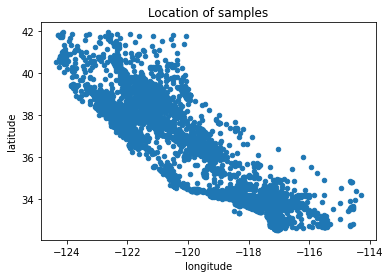

In [36]:
housing.plot(kind="scatter", x="longitude", y="latitude", title="Location of samples")